<a href="https://colab.research.google.com/github/audreychela/Audrey_first_repo/blob/main/logistic_reg_model_comparisson(21)lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll investigate using scikit-learn with regularization in order to produce better models.

## Objectives

- Compare the different inputs with logistic regression models and determine the optimal model

In [24]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_curve, auc


## Import the data

Import the dataset stored in `'heart.csv'`.

In [4]:
# Import the data

df = pd.read_csv("heart.csv")

# Print the first five rows of the data
df[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Split the data

Define `X` and `y` where the latter is the `target` variable. This time, follow best practices and also implement a standard train-test split. Assign 25% to the test set and set the `random_state` to 17.

In [6]:
# Define X and y
y = df["target"]
X = df.drop("target", axis=1)

# Split the data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state= 42)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

target
1    124
0    103
Name: count, dtype: int64 

 target
1    41
0    35
Name: count, dtype: int64


## Initial Model - scikit-learn

Use scikit-learn to build the logistic regression model.

Turn off the intercept and set the regularization parameter, `C`, to a ridiculously large number such as 1e16.

In [17]:
# Your code here
initial_model = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear', max_iter = 1000)
#fitting model
initial_model.fit(X_train, y_train)
#predict
y_pred = initial_model.predict(X_test)
#accuracy
acc_ = accuracy_score(y_test,y_pred)
#confusion matrix
conf_ =confusion_matrix(y_test, y_pred)
#classification report
clas_ =classification_report(y_test, y_pred)
print("Accuracy:", acc_)
print("\nConfusion matrix:\n", conf_)
print("\nClassification Report:\n",clas_)



Accuracy: 0.868421052631579

Confusion matrix:
 [[29  6]
 [ 4 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



## Create an ROC Curve for the scikit-learn model

Use both the training and test sets.

Train AUC: 0.9237394300031319
Test AUC: 0.9135888501742161


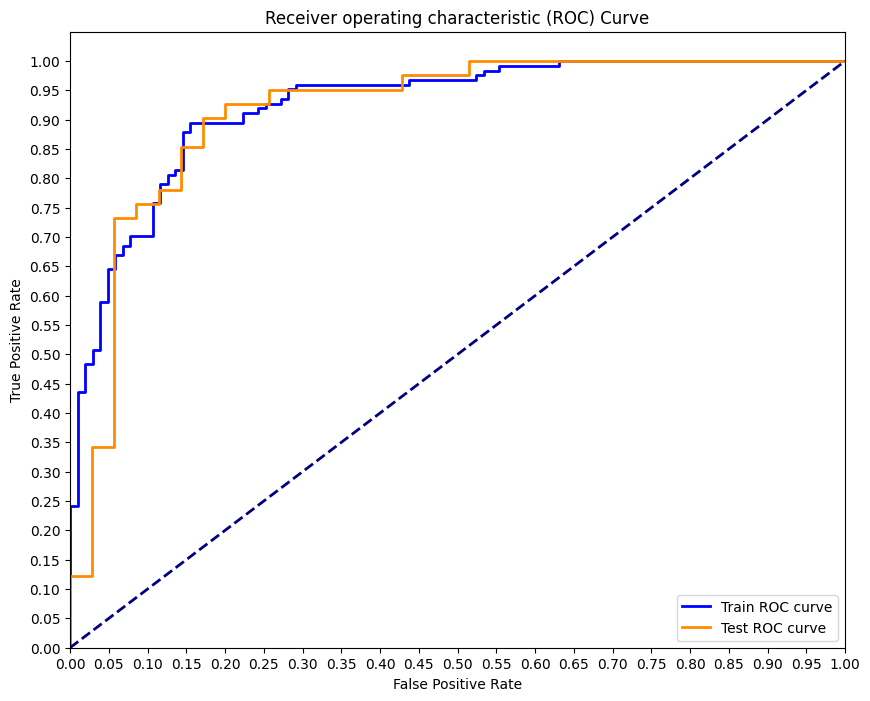

In [26]:
# Your code here

y_train_score = initial_model.predict_proba(X_train)[:,1]

y_test_score = initial_model.predict_proba(X_test)[:, 1]


train_fpr, train_tpr, train_thresholds = roc_curve(y_train,y_train_score)
train_auc= auc(train_fpr, train_tpr)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
test_auc = auc(test_fpr, test_tpr)


print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Add an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter `C` set to a very large number such as 1e16.

In [31]:
# Create new model
logregi = LogisticRegression(fit_intercept=True, C=1e16, solver='liblinear', max_iter=1000)
#fit the model on the training data
logregi.fit(X_train,y_train)
#check the intercept and coefficient
print("Intercept:", logregi.intercept_)

print("Coefficients:", logregi.coef_)

Intercept: [2.91423971]
Coefficients: [[-0.00175511 -1.5598189   0.91926245 -0.01402365 -0.0025254   0.0936013
   0.81572099  0.01681056 -1.16294628 -0.65446287  0.76255929 -0.89703207
  -1.0816987 ]]


Generate predictions for the training and test sets.

In [32]:
# Generate predictions
y_hat_train = logregi.predict_proba(X_train)[:, 1]

y_hat_test = logregi.predict_proba(X_test) [:, 1]

Plot all three models ROC curves on the same graph.

Custom Model Test AUC: 0.913588850174216
Custome Model Train AUC: 0.923582837456937


NameError: name 'logreg' is not defined

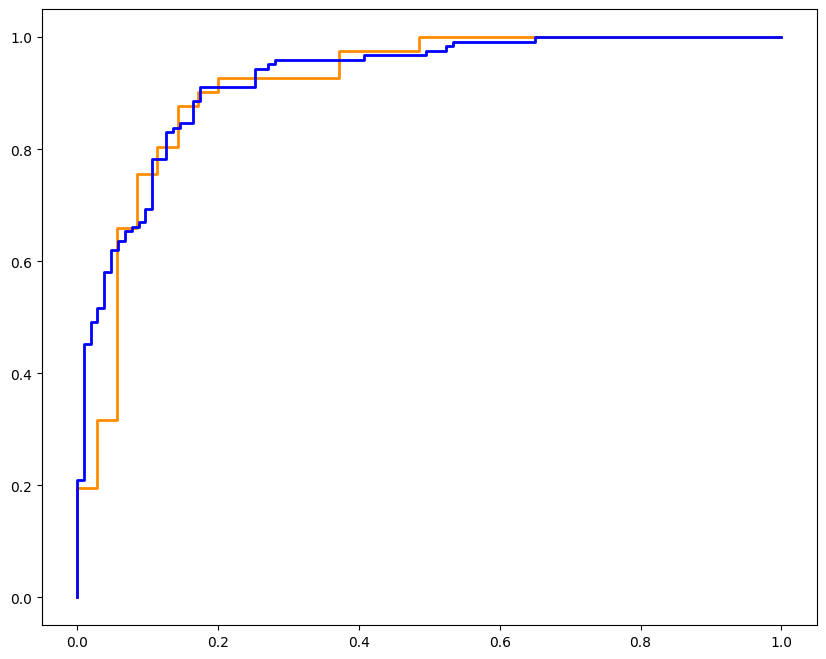

In [34]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score = logregi.predict_proba(X_train)[:, 1]

y_train_score = logregi.predict_proba(X_test)[:, 1]

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (`C`) parameters. For each, plot the ROC curve of the training and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and training AUC as you go along.

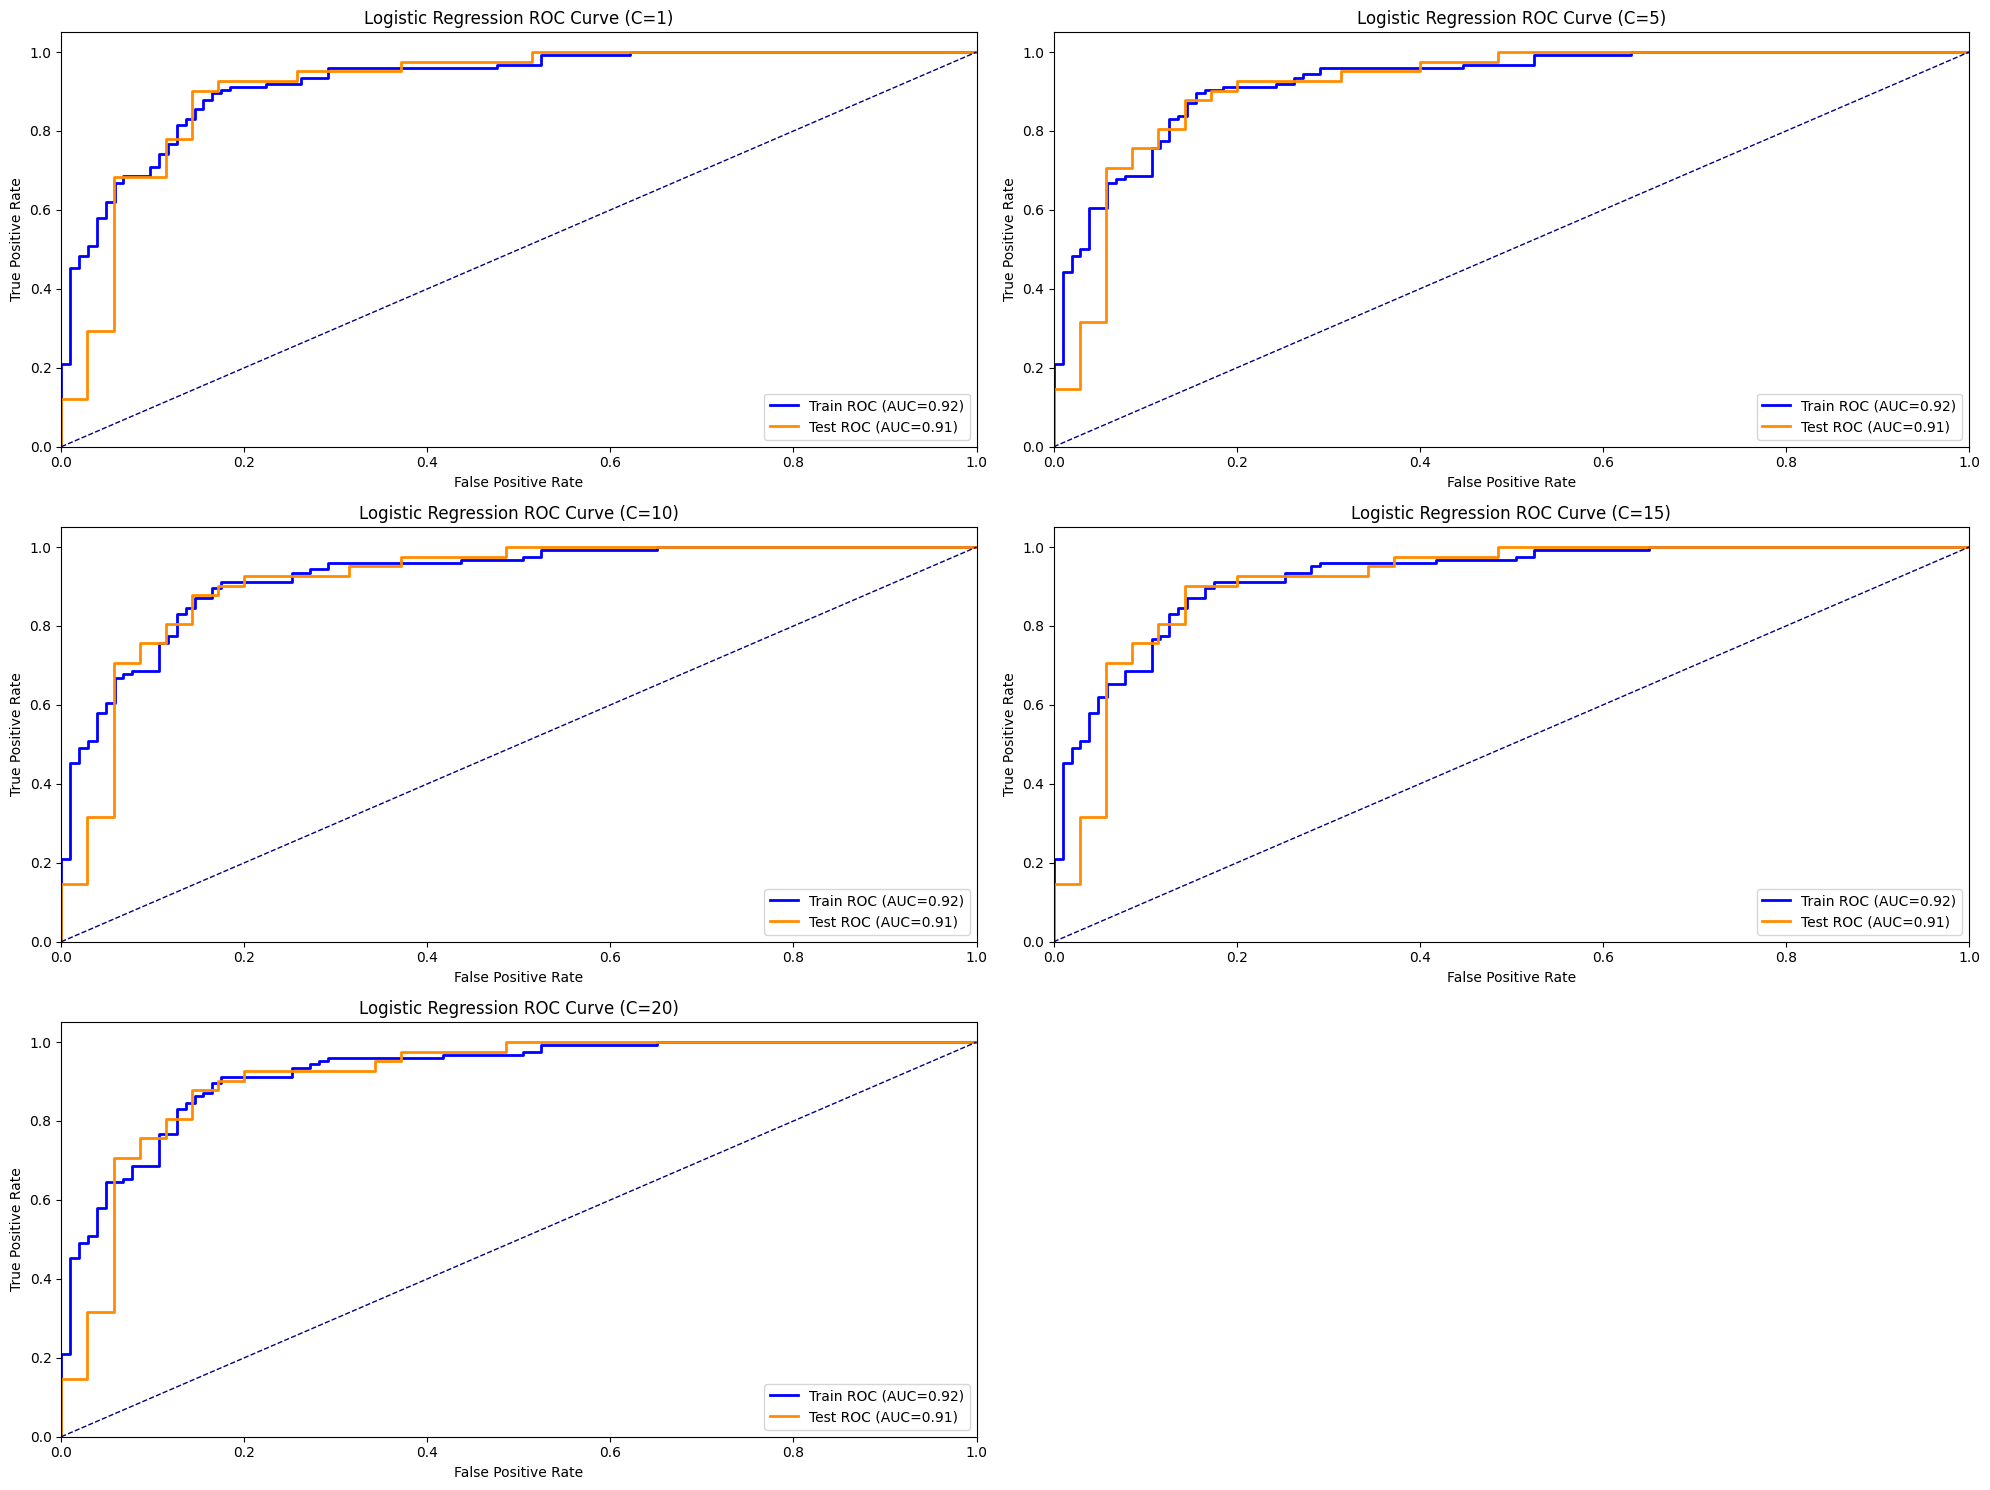

In [37]:
# Your code here

# Regularization parameters to test
C_values = [1, 5, 10, 15, 20]

plt.figure(figsize=(20, 15))  # 5 subplots

for i, C in enumerate(C_values, 1):
    # Create logistic regression with specified C
    model = LogisticRegression(C=C, max_iter=10000, solver='liblinear')
    model.fit(X_train, y_train)

    # Predict probabilities for ROC
    y_train_score = model.predict_proba(X_train)[:,1]
    y_test_score = model.predict_proba(X_test)[:,1]

    # Compute ROC metrics
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_score)
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)

    # Plot in subplot
    plt.subplot(3, 2, i)
    plt.plot(train_fpr, train_tpr, color='blue', lw=2, label=f'Train ROC (AUC={train_auc:.2f})')
    plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'Test ROC (AUC={test_auc:.2f})')
    plt.plot([0,1], [0,1], color='navy', lw=1, linestyle='--')
    plt.title(f'Logistic Regression ROC Curve (C={C})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])

plt.tight_layout()
plt.show()


How did the regularization parameter impact the ROC curves plotted above?

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.